<a href="https://colab.research.google.com/github/sabnadk/PCVK_Ganjil_2023/blob/main/week3_Sabna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sabna Devi Kumalasari / 2141720009

## MODUL 3 – Operasi Citra Sederhana – Linier Brightness, Contrast, *Inverse*, Logarithmic Brightness, dan Grayscale Image


### Praktikum

2. akses folder images pada Google Drive Anda dengan kode berikut:

In [6]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3. Transformasi Linier Brightness

Mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan: 50


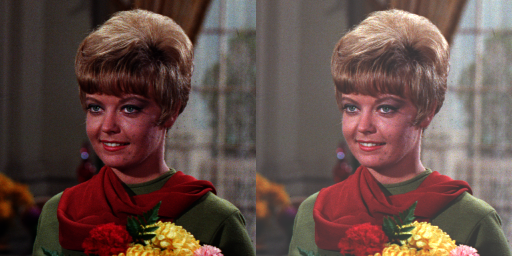

In [8]:
print('Mengubah tingkat kecerahan citra')
print('---------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

### TUGAS PRAKTIKUM

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:


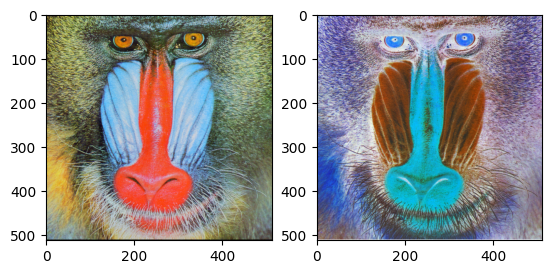

In [11]:
img = cv.imread("/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/mandrill.tiff")
img_asli = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_inverse = 255 - img_asli

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_asli)
ax[1].imshow(img_inverse)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukan tingkat kecerahan [-255 - 255]:50
Masukkan kontras [1.0 - 3.0]:2


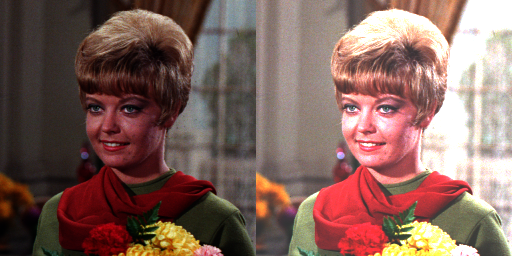

In [12]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')

try:
  brightness = int(input('Masukan tingkat kecerahan [-255 - 255]:'))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

 Mengubah tingkat kecerahan citra dengan Transformasi Log
----------------------------------------------
Masukkan nilai kecerahan:50


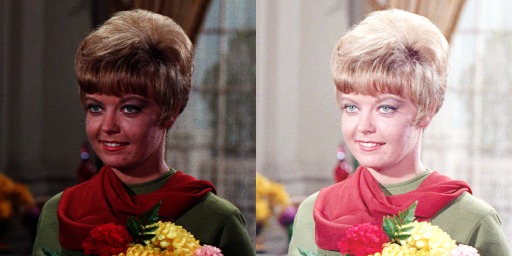

In [13]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('----------------------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*  (np.log(1 + original[y,x,c])), 0 , 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

  a. Averaging

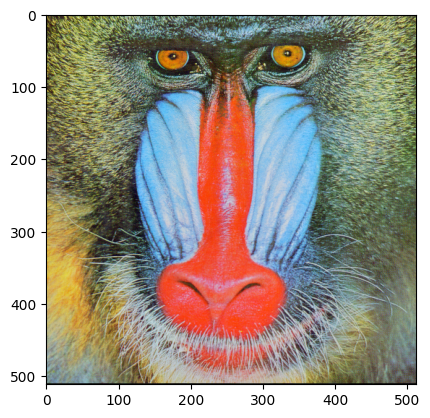

In [15]:
img = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/mandrill.tiff')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

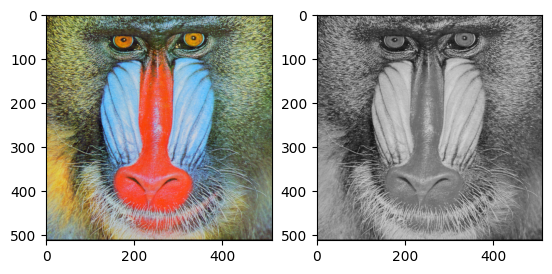

In [16]:
# a. averaging
img_avg = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/mandrill.tiff')
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

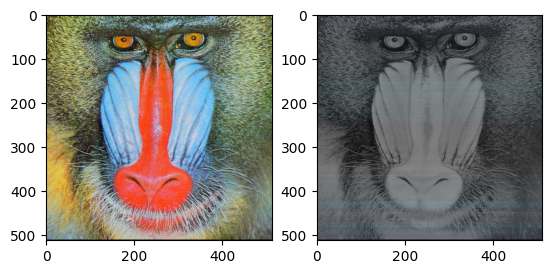

In [17]:
# b. Lightness

img_light = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/mandrill.tiff')
img_light[:] = np.max(img_light, axis=-1, keepdims=100)/2 + np.min(img_light, axis=-2, keepdims=100)/3
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_light)

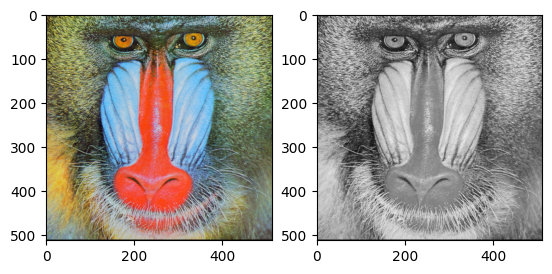

In [34]:
# c. Luminance
img_lum = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/mandrill.tiff')
R, G, B = img_lum[: , : , 0], img_lum[: , : , 1], img_lum[: , : , 2]
gray_img_lum = (0.24 * R) + (0.77 * G) + (0.06 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_img_lum, cmap = 'gray')

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

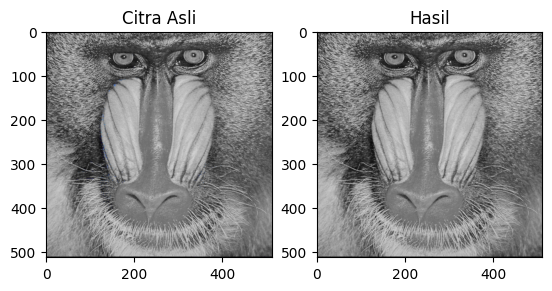

In [35]:
img = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/mandrill.tiff')

# Tentukan batas ambang untuk warna biru (misalnya, 180)
lower_blue = np.array([0, 100, 180])
upper_blue = np.array([100, 100, 255])

# Buat mask untuk warna biru
mask = cv.inRange(img, lower_blue, upper_blue)

# Buat citra grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Ubah citra grayscale menjadi citra tiga saluran (BGR)
gray_bgr = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# Gabungkan citra grayscale dengan citra warna biru menggunakan mask
result = cv.bitwise_and(img, img, mask=mask)

# Buat citra hasil akhir dengan menggabungkan citra warna biru dan grayscale
final_output = cv.add(result, gray_bgr)

# Tampilkan citra asli dan citra hasil
fig, ax = plt.subplots(1, 2)
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Citra Asli')

ax[1].imshow(cv.cvtColor(final_output, cv.COLOR_BGR2RGB))
ax[1].set_title('Hasil')
plt.show()

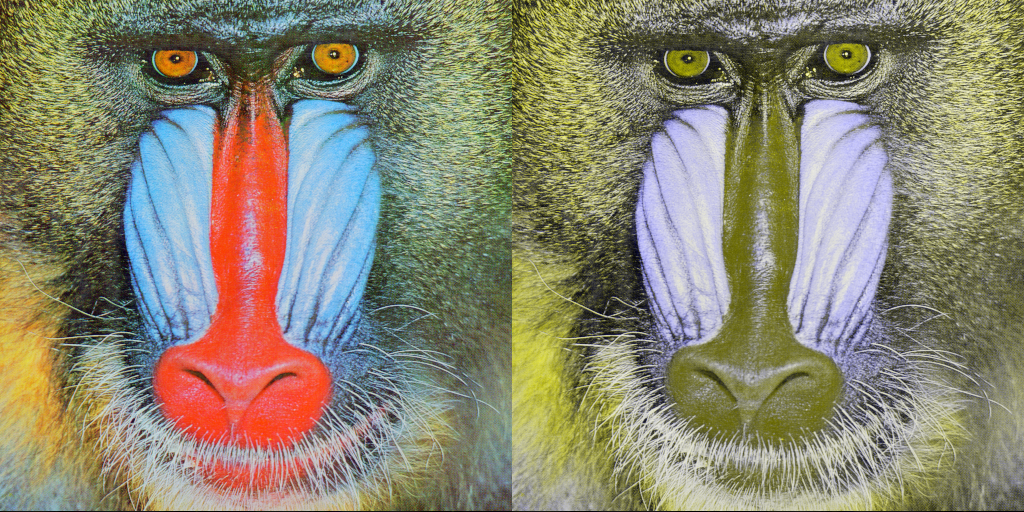

In [21]:
from numpy.ma.extras import average
original = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/mandrill.tiff')
inverse_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
        r = original[y,x,2]*0.21
        g = original[y,x,1]*0.80
        b = original[y,x,0]*0.07

        maxmin=(r+g+b)

        inverse_image[y,x,2] = np.clip(maxmin, 0, 255)
        inverse_image[y,x,1] = np.clip(maxmin, 0, 255)
        inverse_image[y,x,0] = original[y,x,0]

final_frame = cv.hconcat((original, inverse_image))
cv2_imshow(final_frame)

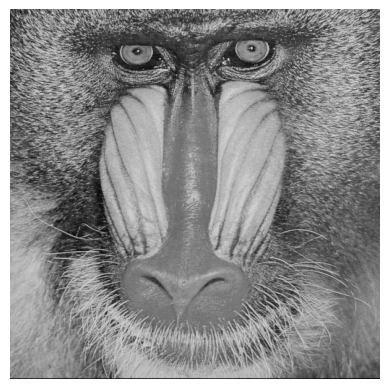

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ganti dengan path gambar masukan Anda
input_image_path = "/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/mandrill.tiff"
output_image = convert_to_grayscale_except_blue(input_image_path)

# Fungsi untuk mengubah gambar menjadi abu-abu kecuali warna biru
def convert_to_grayscale_except_blue(input_image_path):
    # Baca gambar
    image = cv2.imread(input_image_path)

    # Ubah warna biru menjadi saluran warna penuh dan saluran lainnya menjadi abu-abu
    mask = (image[50,0,0] < 100) | (image[50,0,1] < 100)  # Atur batasan warna biru sesuai kebutuhan
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    output_image = np.zeros_like(image)
    output_image[mask] = image[mask]
    output_image[~mask] = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)

    return output_image



# Tampilkan gambar hasil
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
